In [ ]:
from IPython.display import Image, clear_output
!pip install roboflow
clear_output()

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="c8vphQCAVmrQYPUnhTgb", model_format="yolov5")
dataset = rf.workspace().project("oxford-pets").version("1").download(location="/content")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content in yolov5pytorch:: 100%|██████████| 7171/7171 [00:05<00:00, 1372.33it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12078, done.
remote: Total 12078 (delta 0), reused 0 (delta 0), pack-reused 12078
Receiving objects: 100% (12078/12078), 11.88 MiB | 33.07 MiB/s, done.
Resolving deltas: 100% (8382/8382), done.


In [ ]:
%cd yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python /content/yolov5/train.py --batch 128 --epochs 80 --data coco128.yaml --weights '' --cfg yolov5s.yaml --img 416

train: weights=, cfg=yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=128, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train

Launching TensorBoard...

In [ ]:
!python /content/yolov5/val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data coco128.yaml --img 416 

val: data=/content/yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning '/content/valid/labels.cache' images and labels... 716 found, 0 missing, 0 empty, 0 corrupt: 100% 716/716 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 23/23 [00:08<00:00,  2.77it/s]
                 all        716        717       0.68       0.78      0.798      0.589
      cat-Abyssinian        716         16      0.581      0.875      0.796      0.668
       

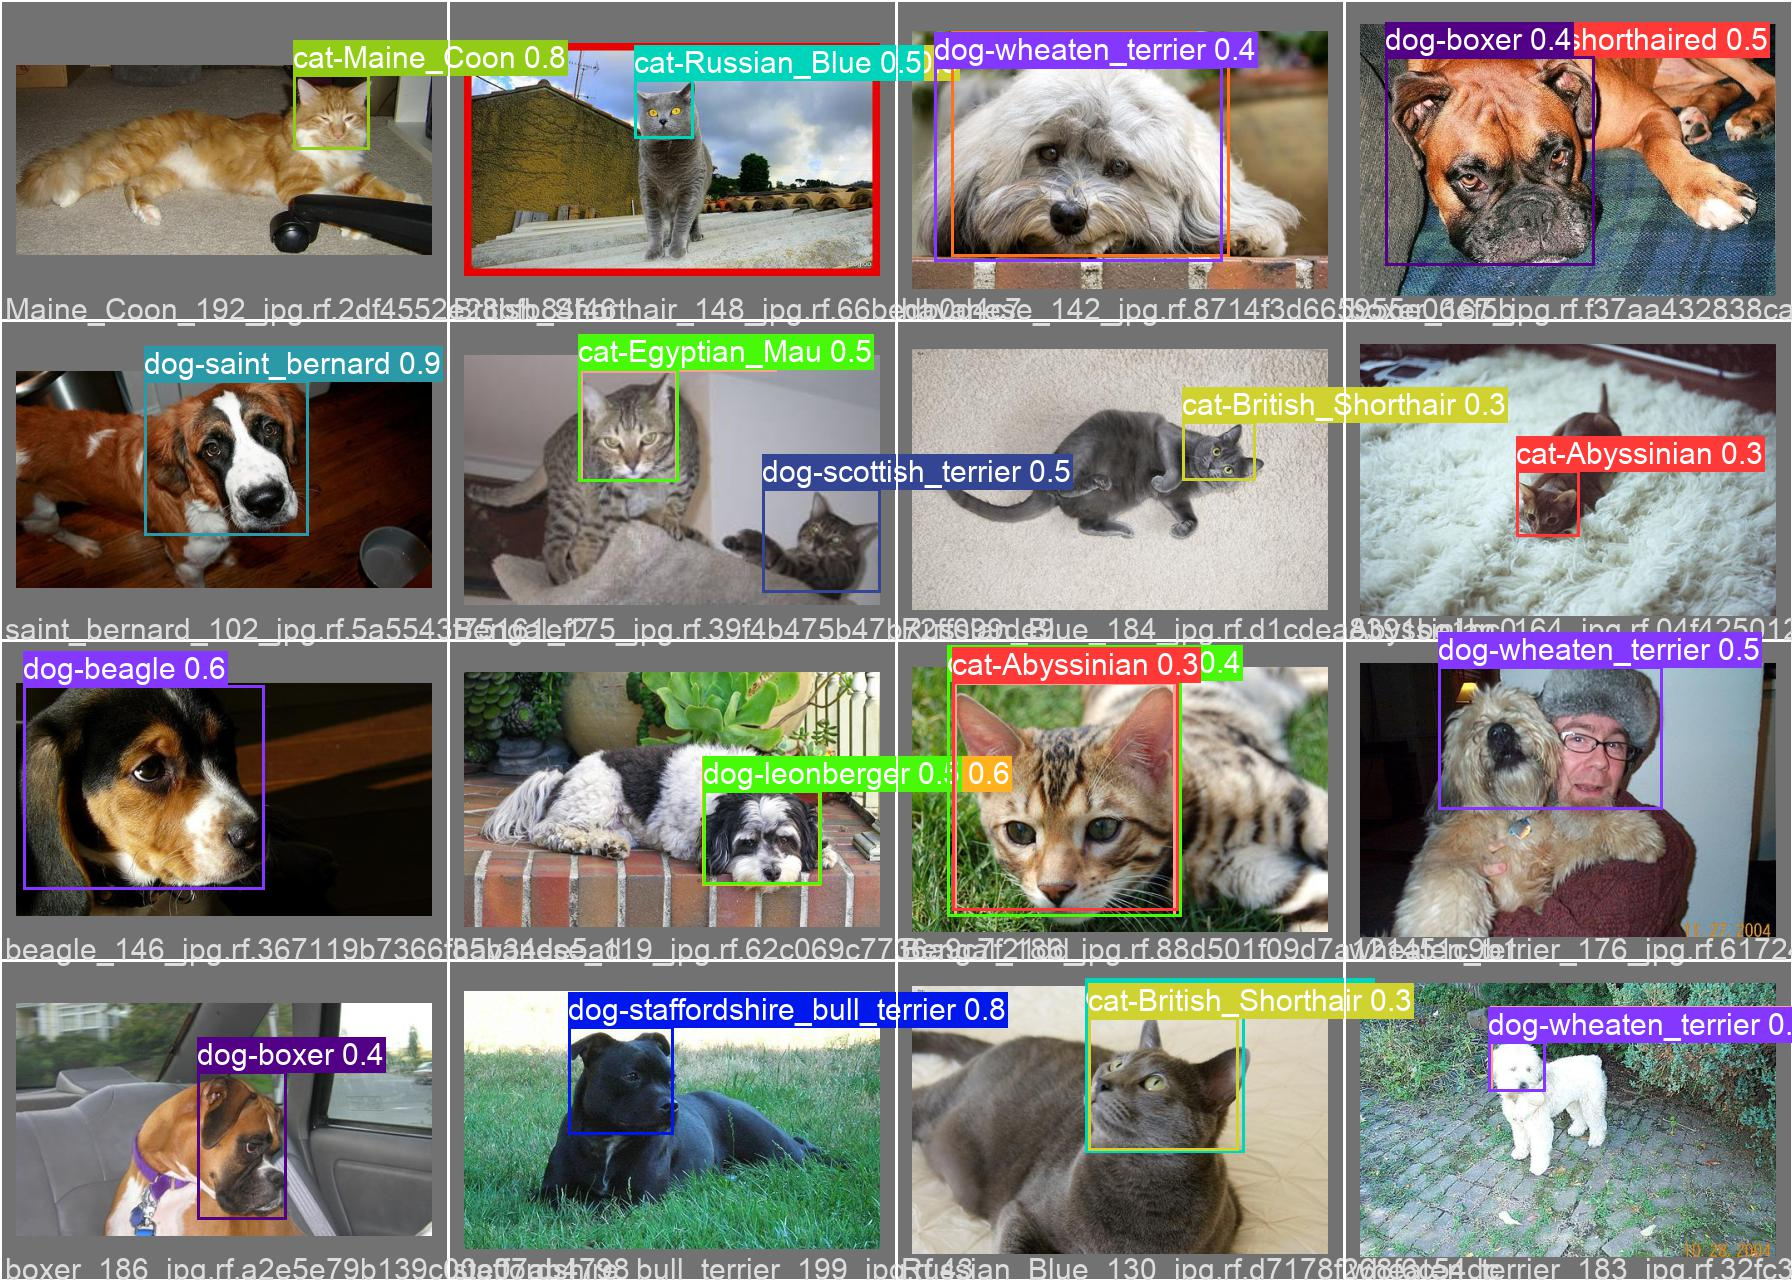

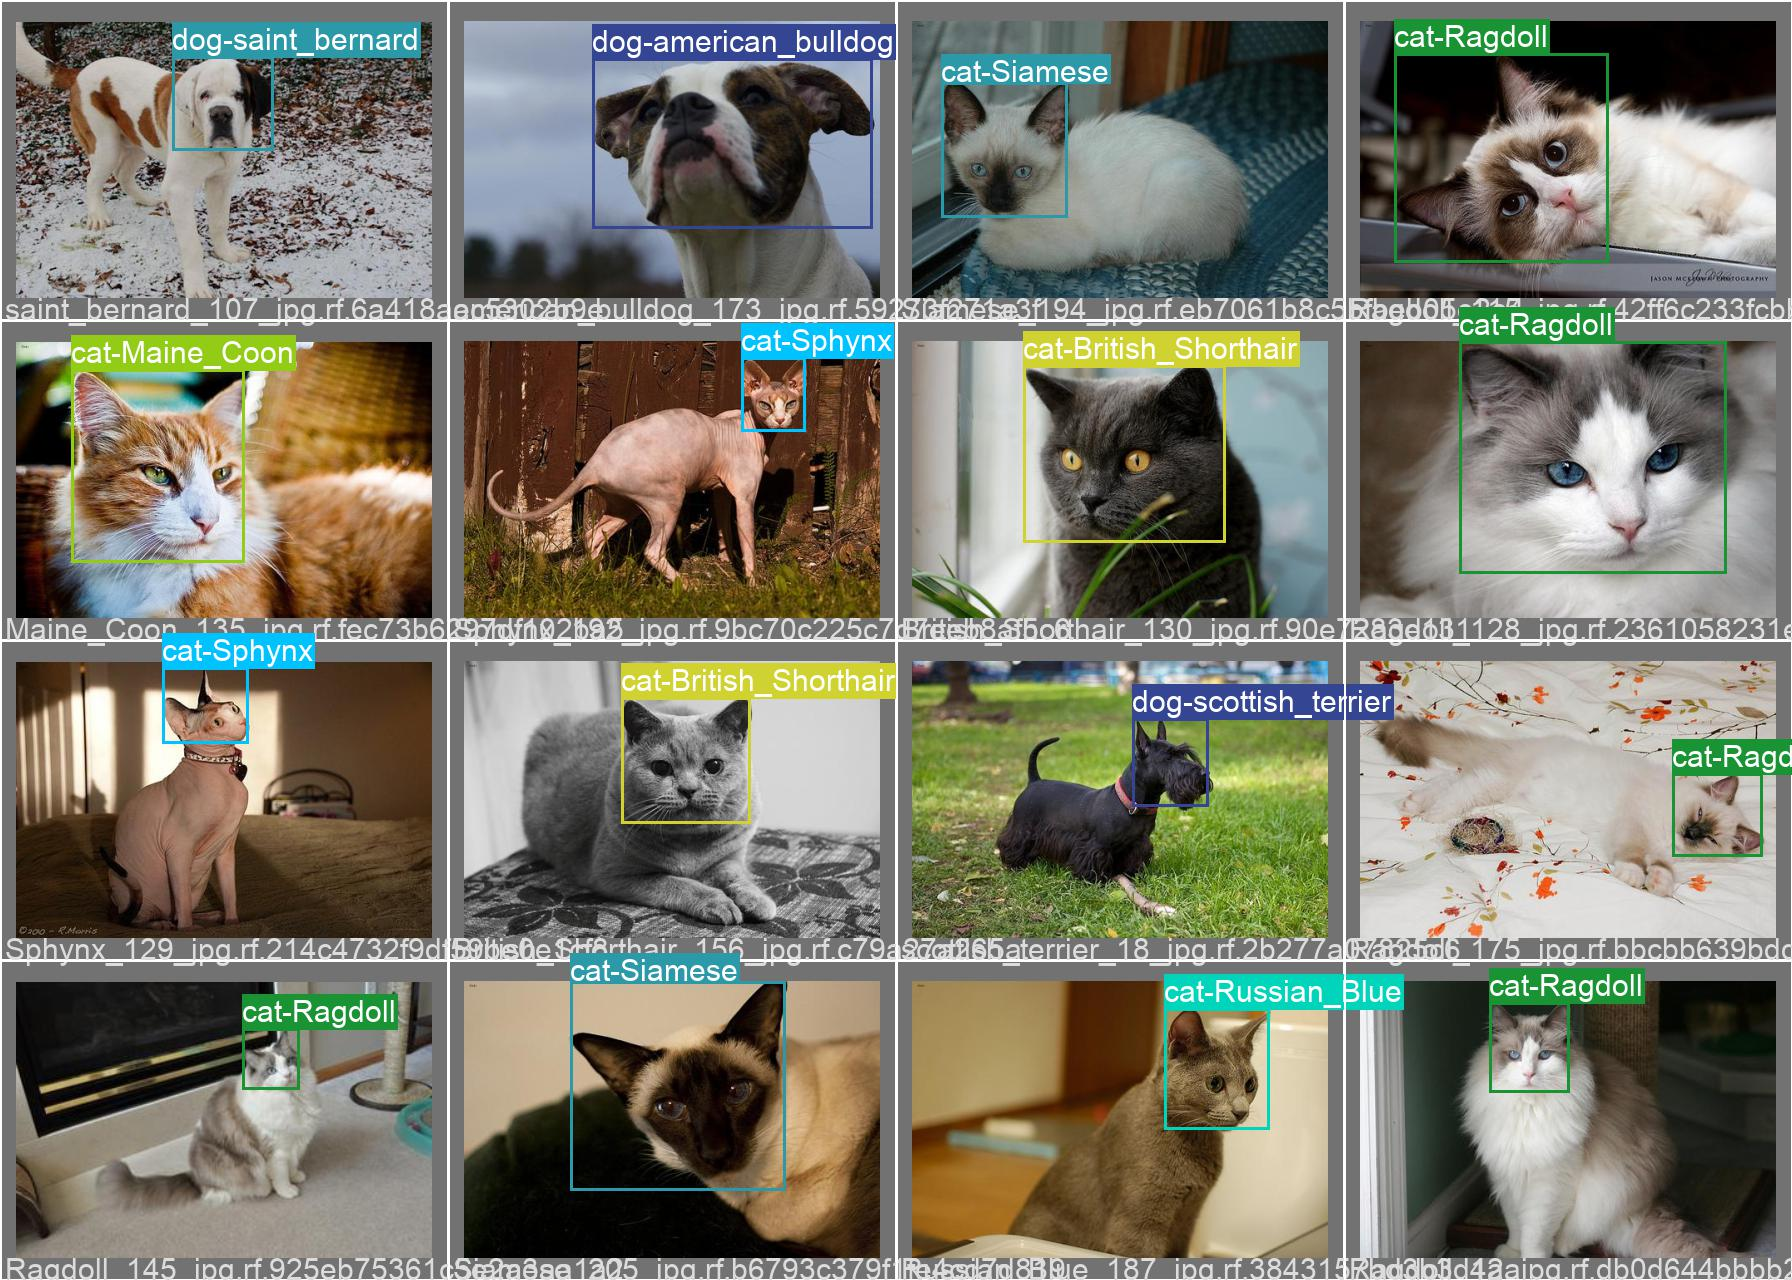

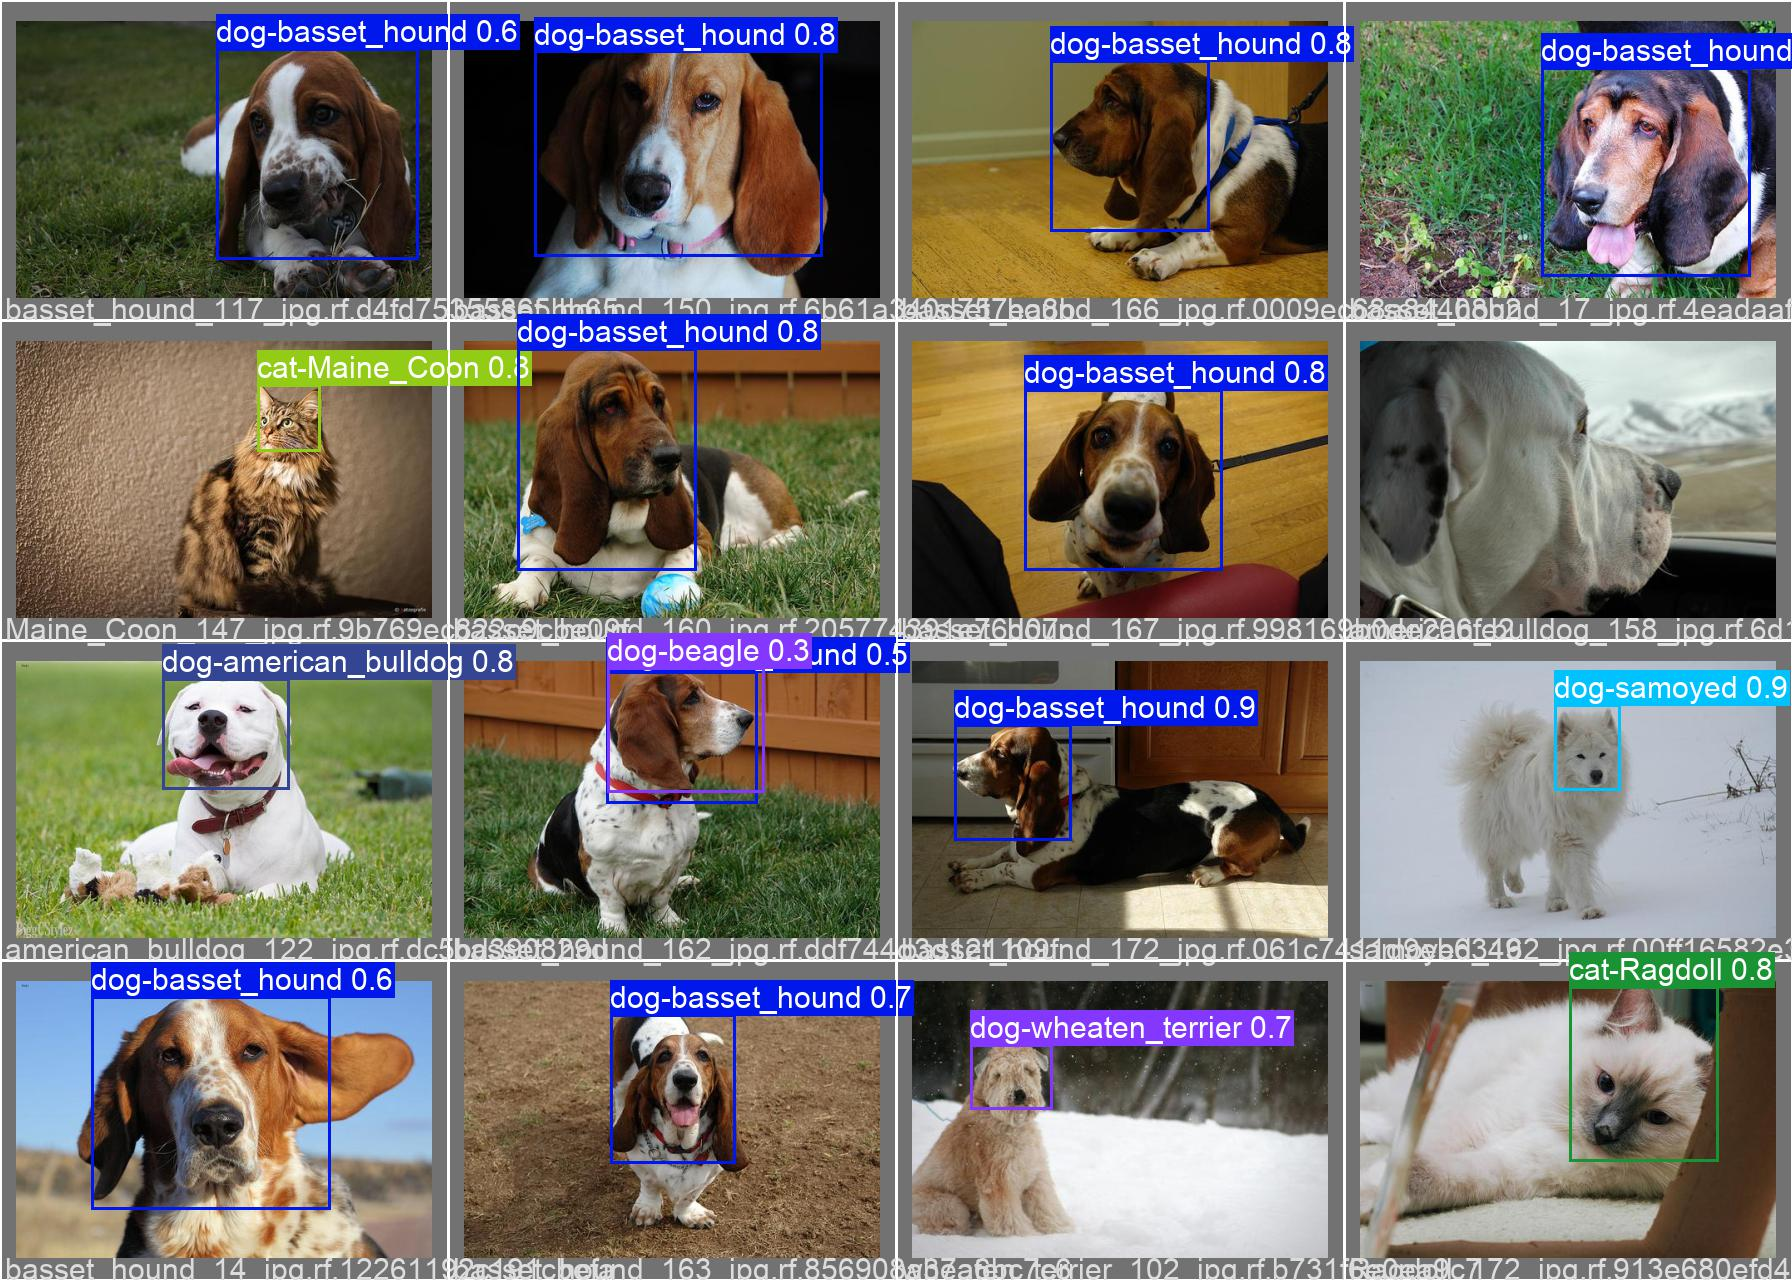

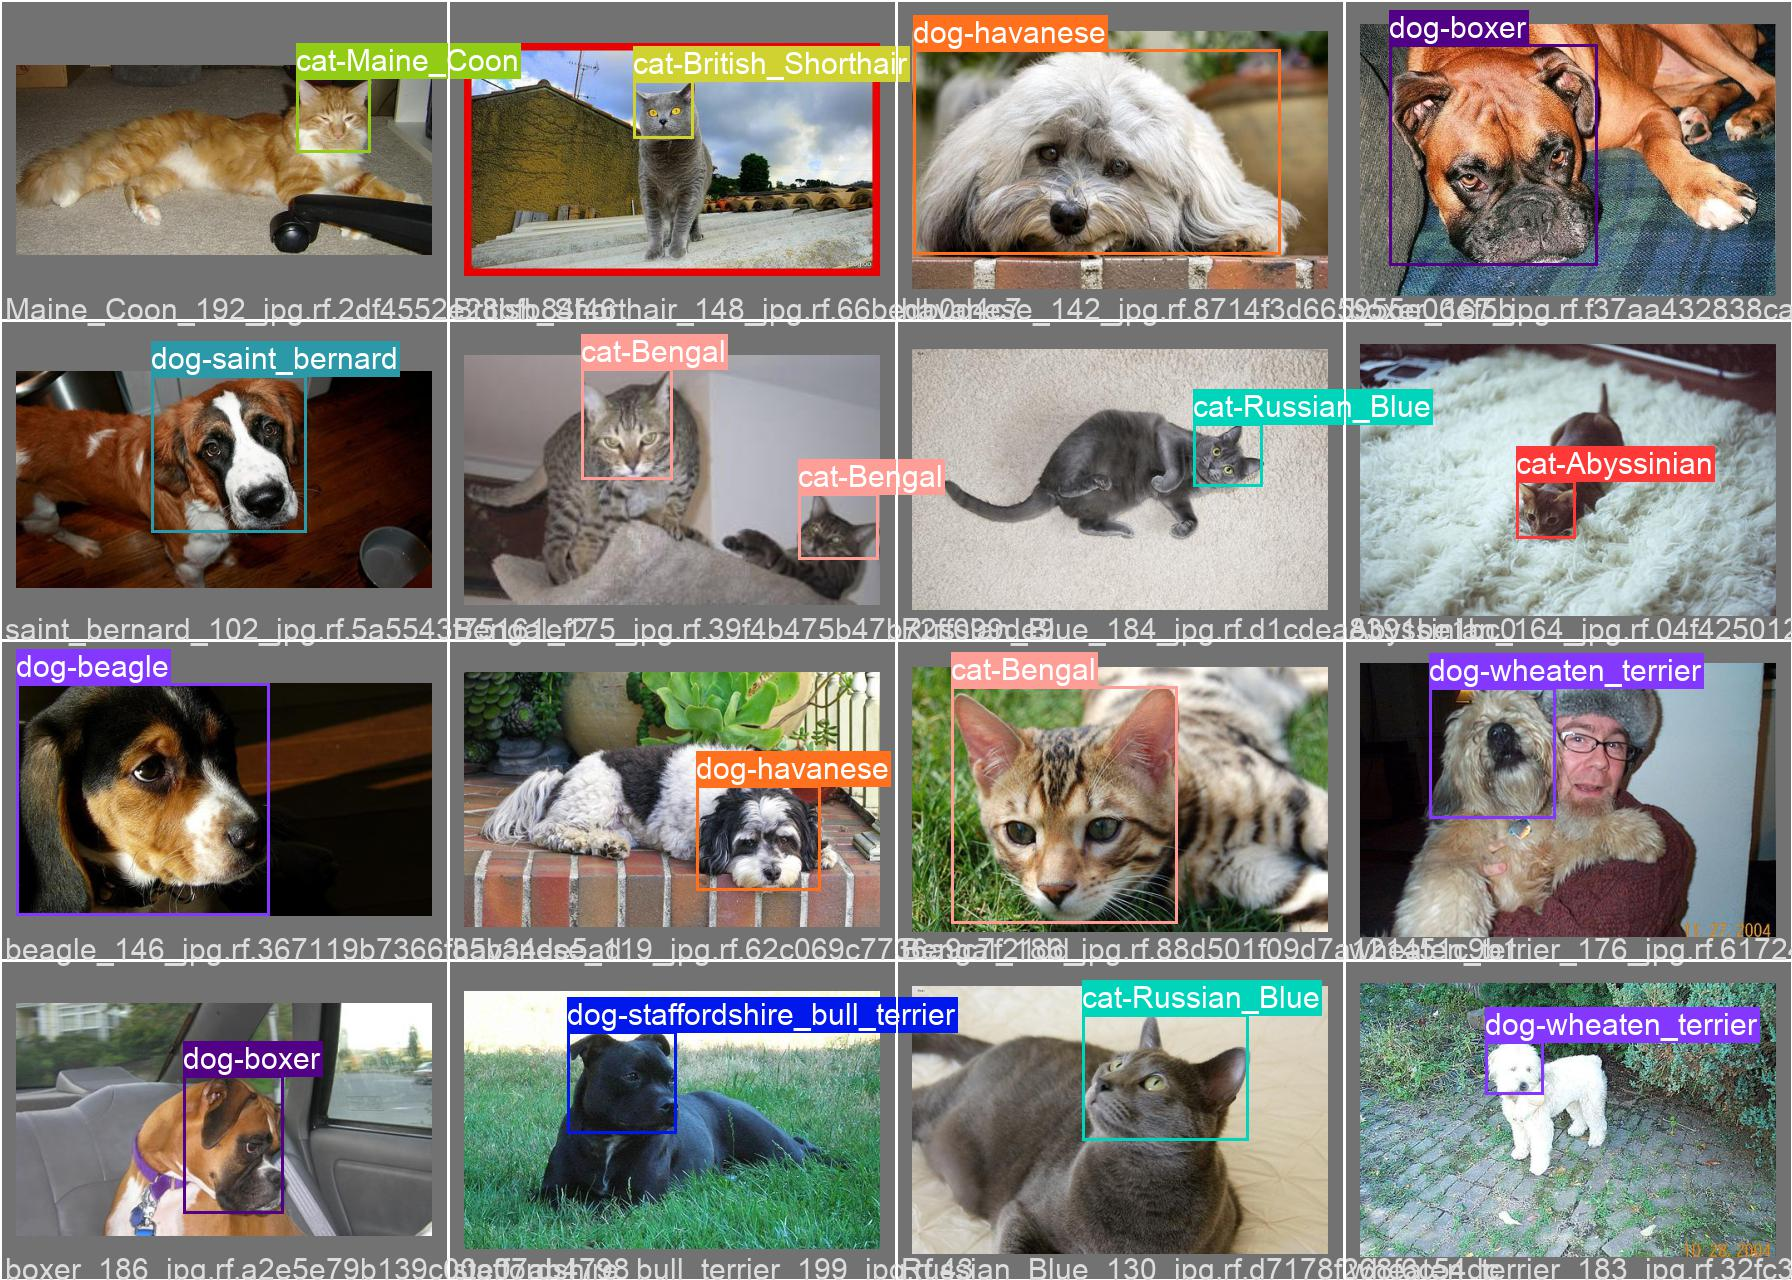

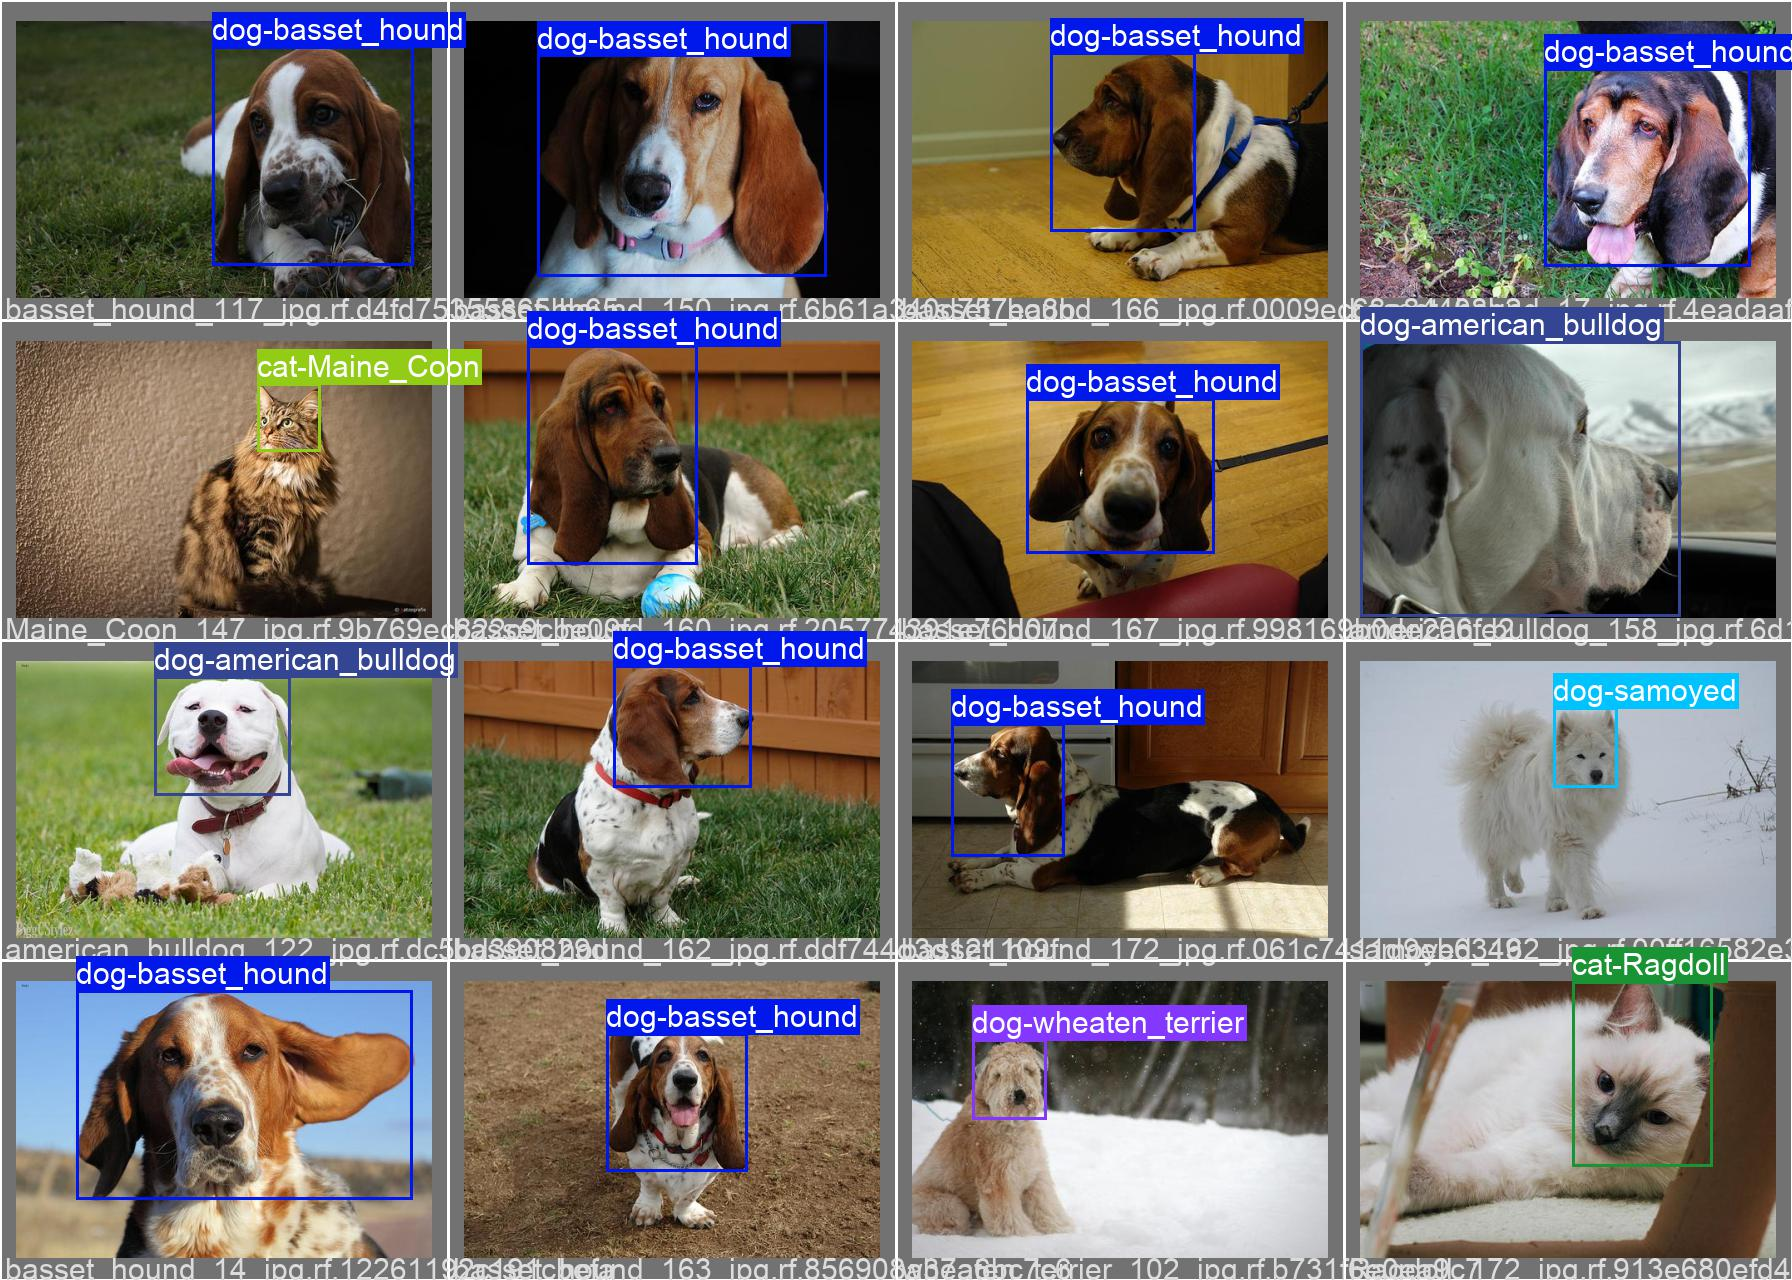

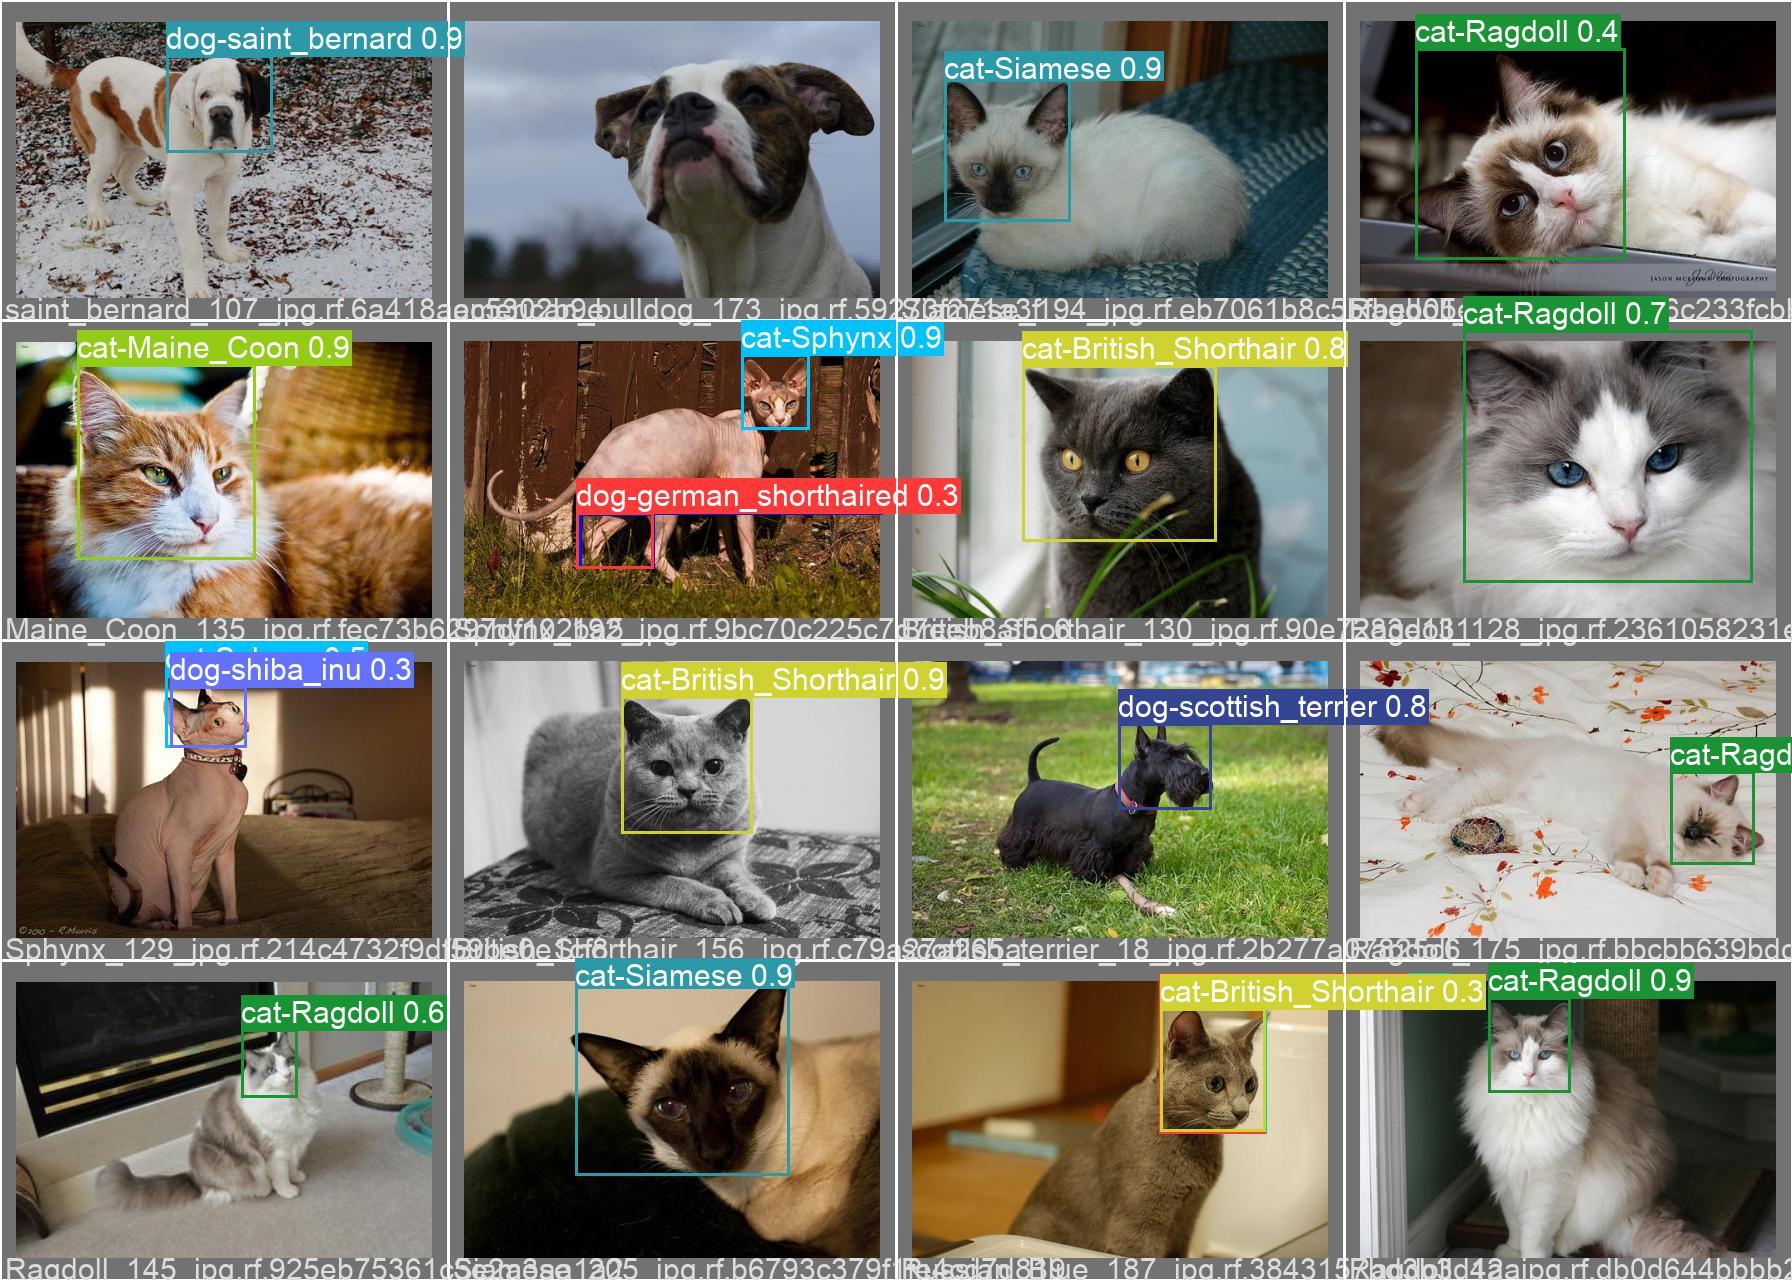

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/val/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python detect.py --source /content/test/images --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --save-txt --save-conf   

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
image 1/356 /content/test/images/Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg: 416x288 1 cat-Abyssinian, 1 cat-Egyptian_Mau, 1 cat-Maine_Coon, Done. (0.015s)
image 2/356 /content/test/images/Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg: 416x416 1 cat-Abyssinian, 1 cat-Sphynx, Done. (0.011s)
image 3/356 /content/te

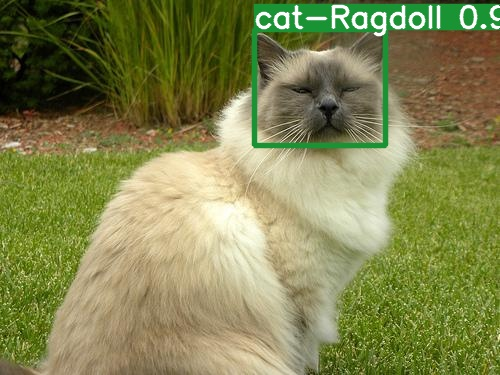

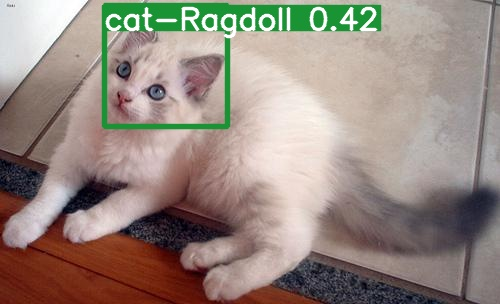

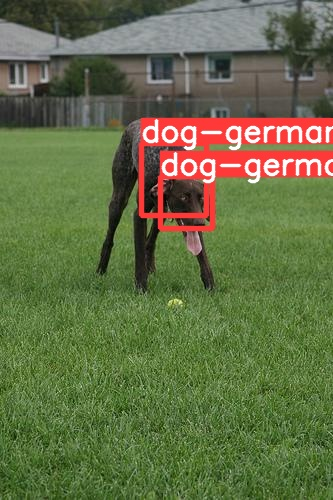

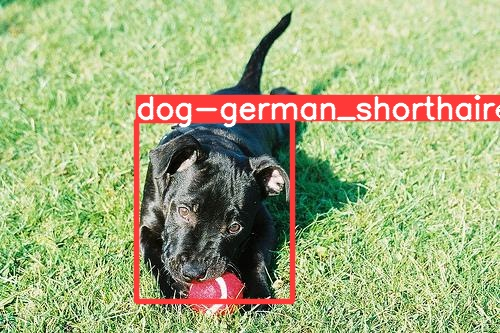

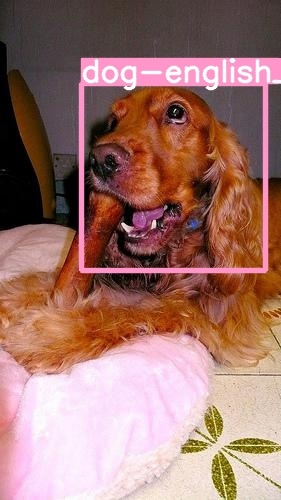

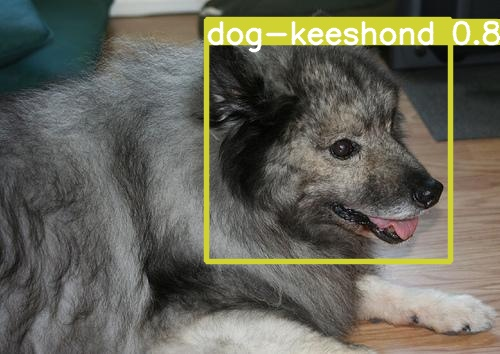

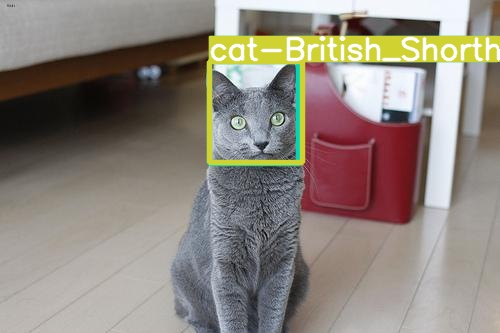

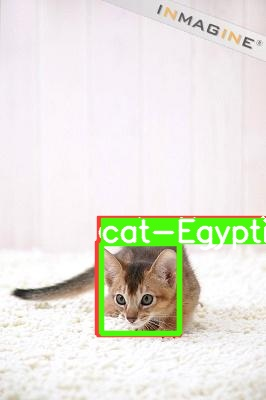

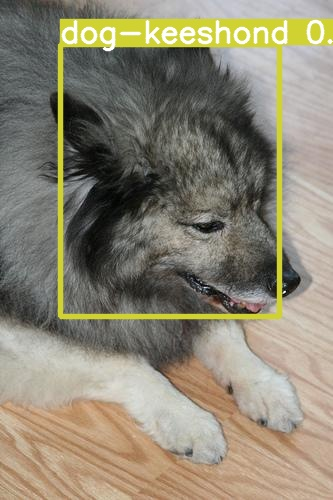

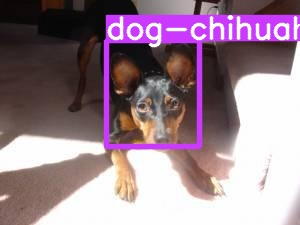

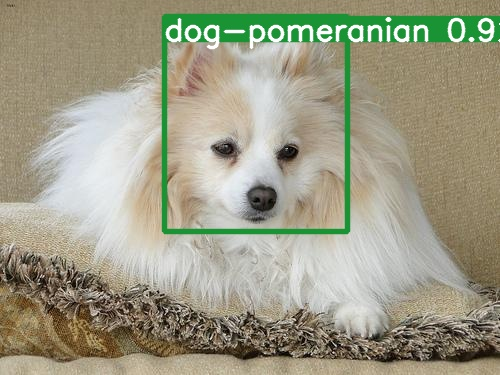

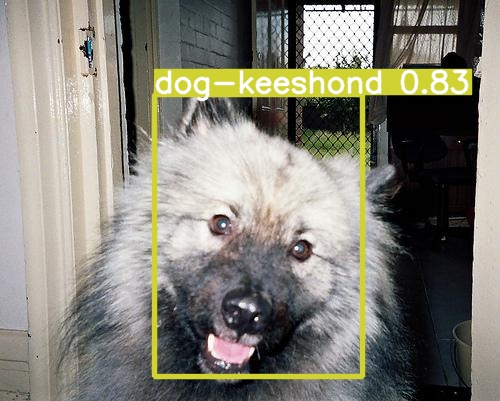

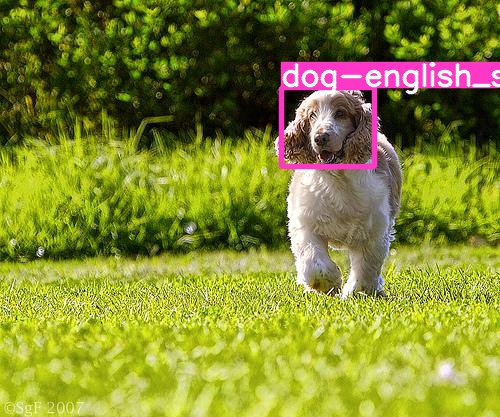

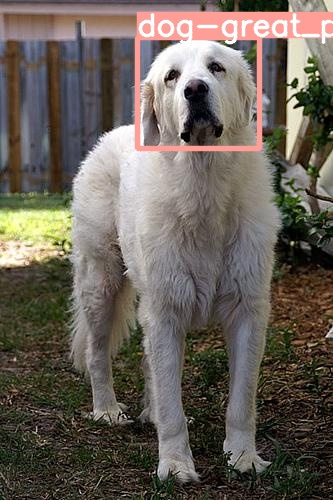

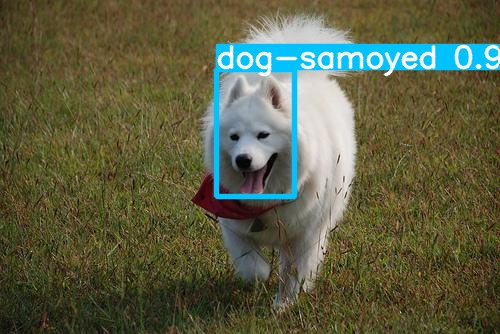

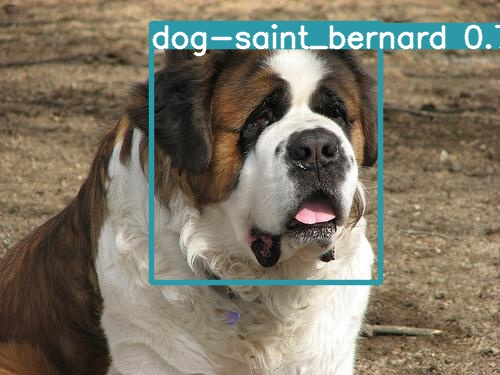

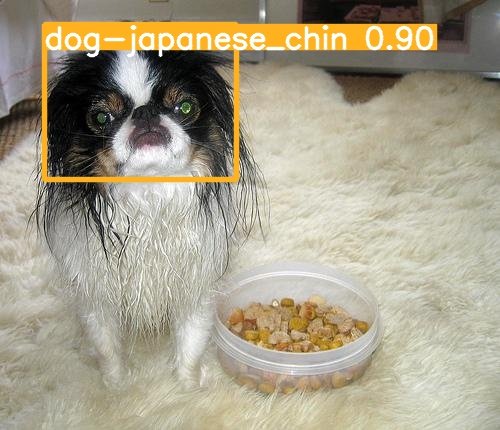

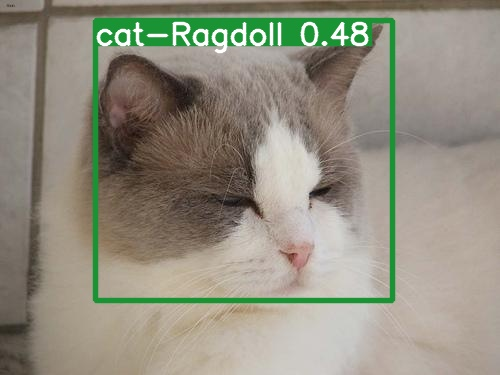

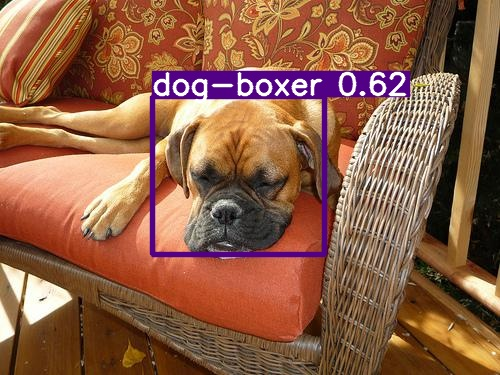

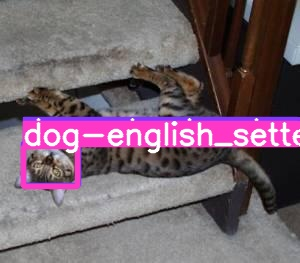

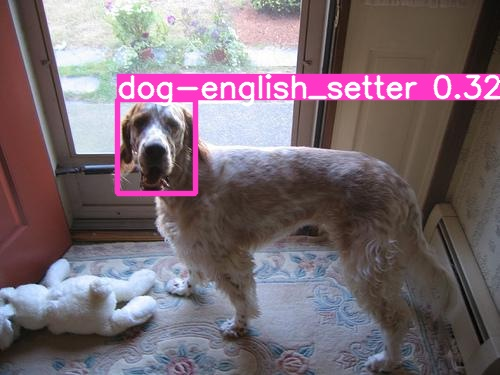

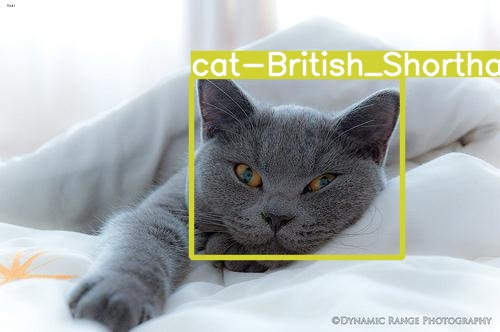

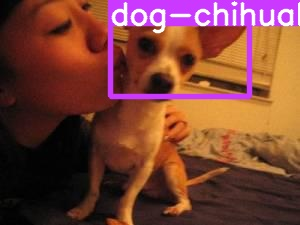

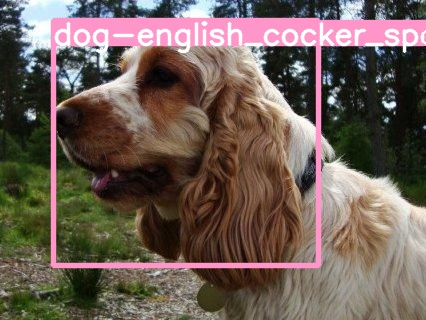

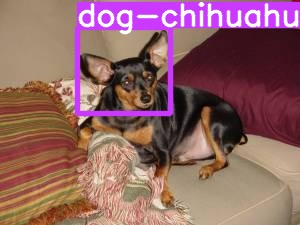

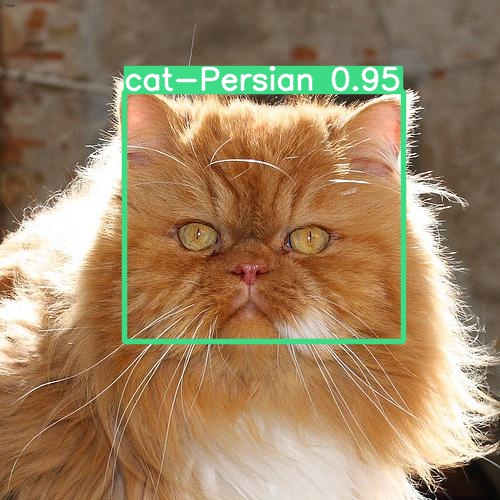

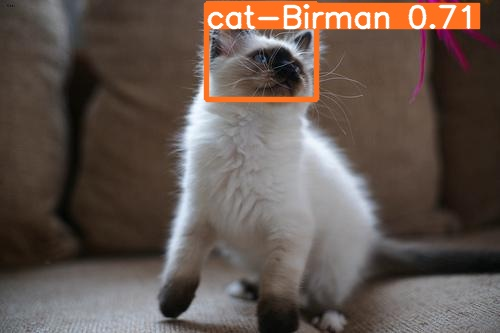

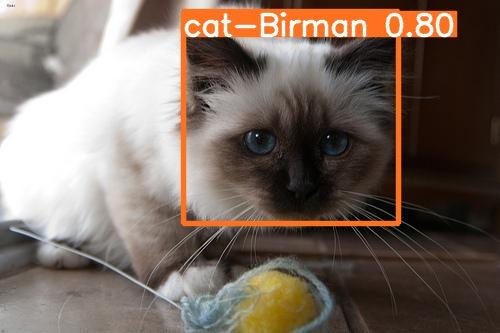

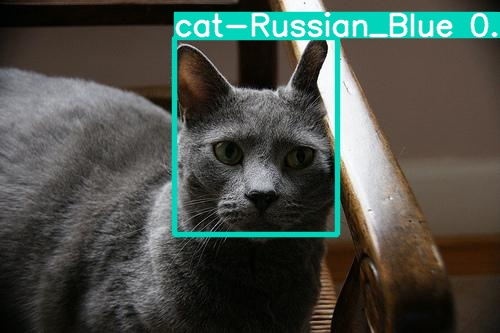

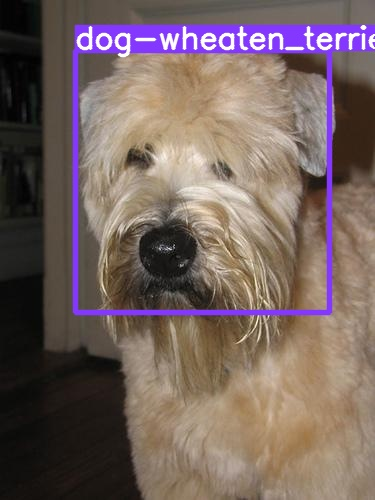

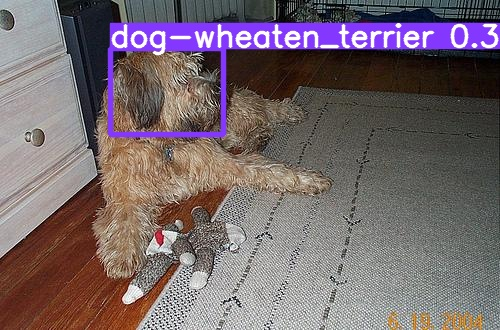

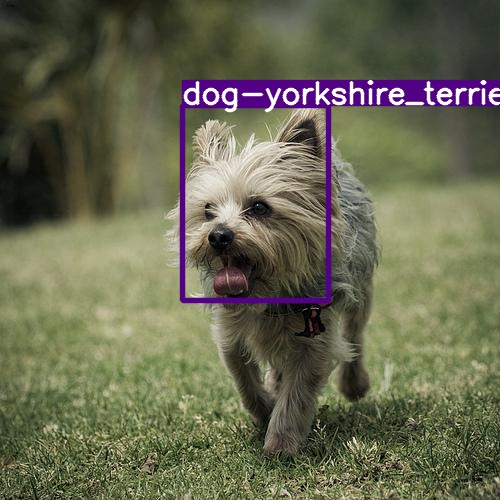

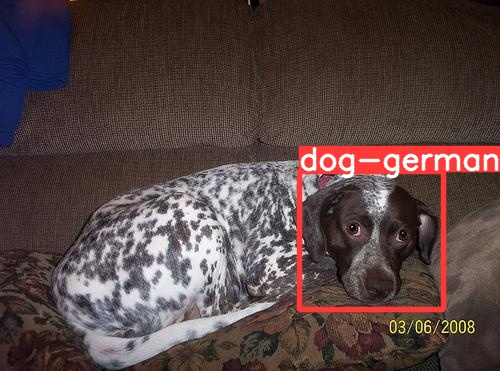

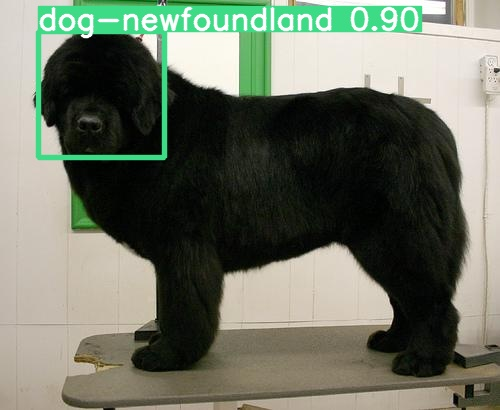

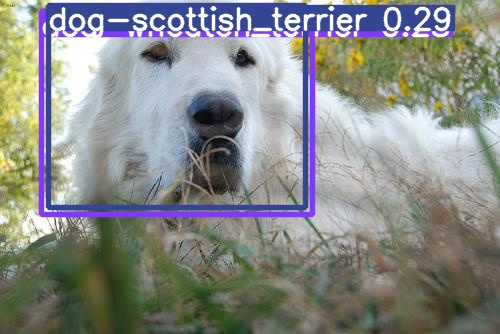

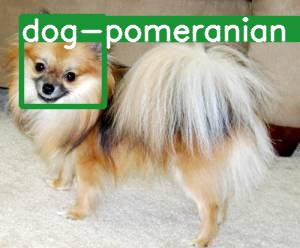

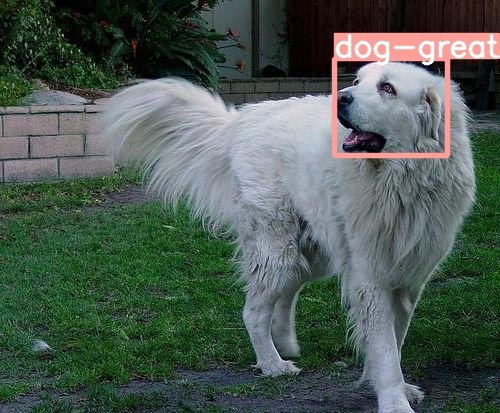

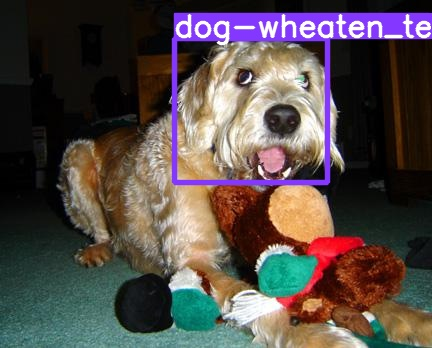

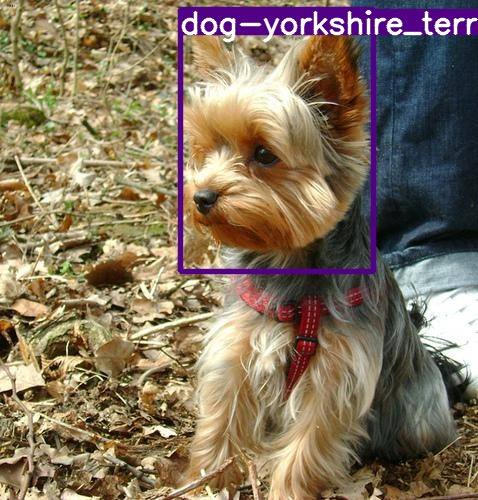

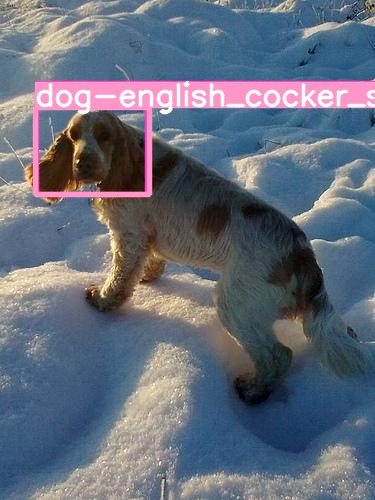

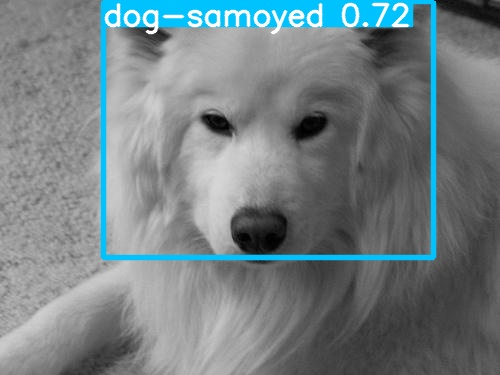

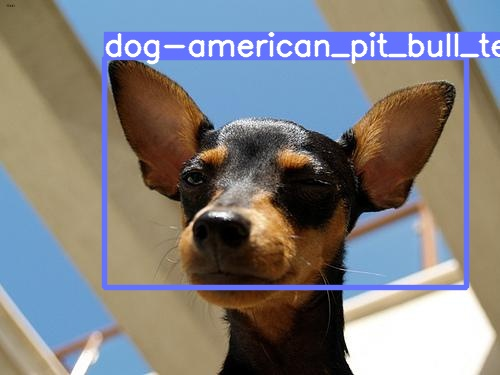

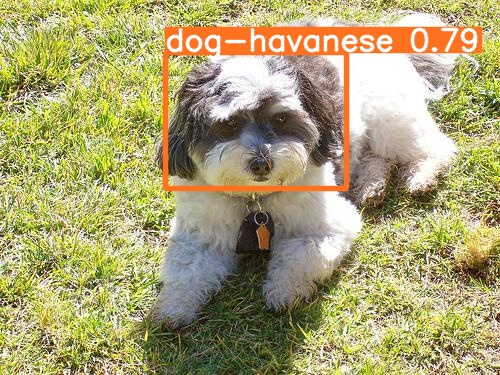

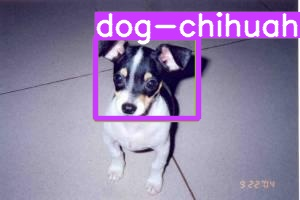

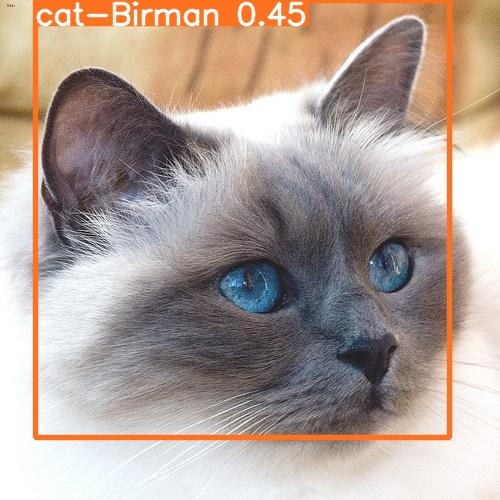

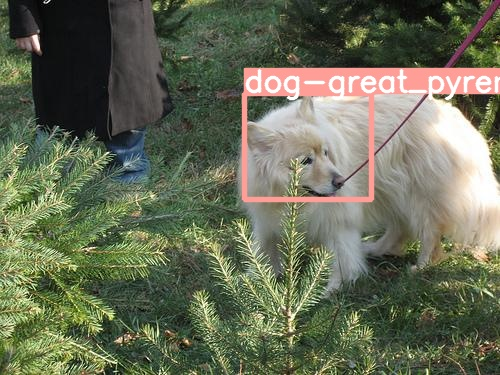

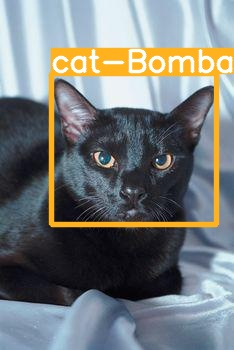

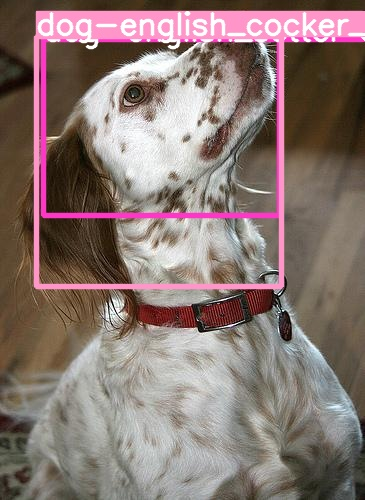

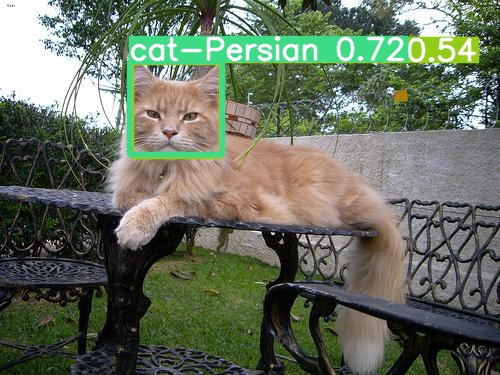

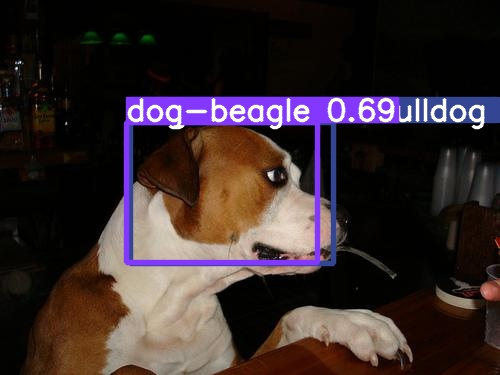

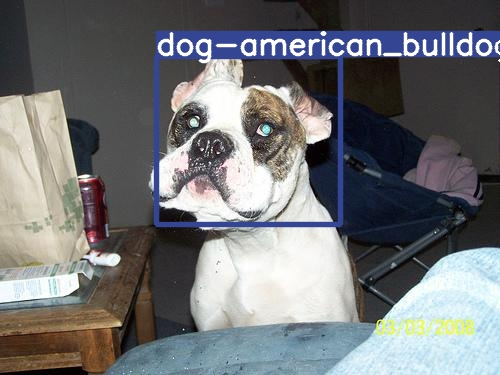

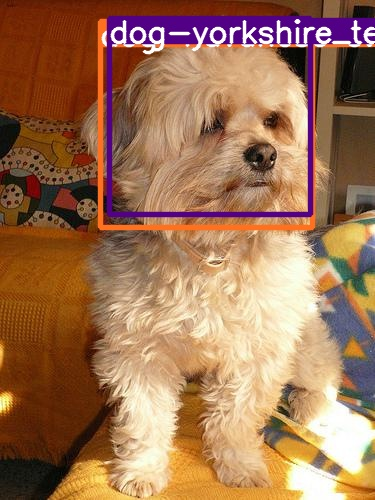

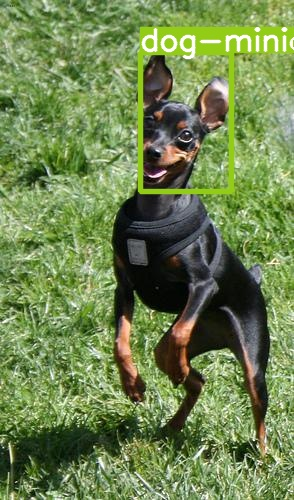

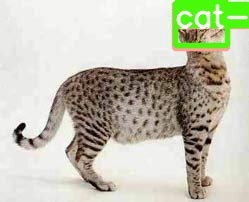

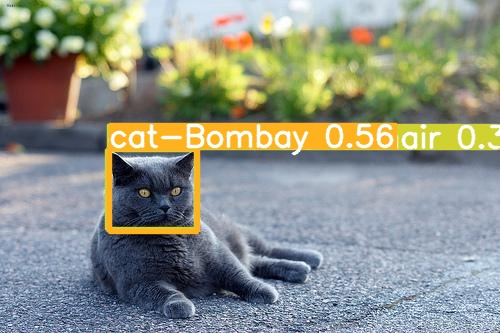

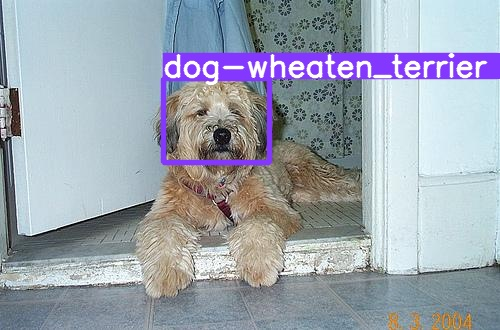

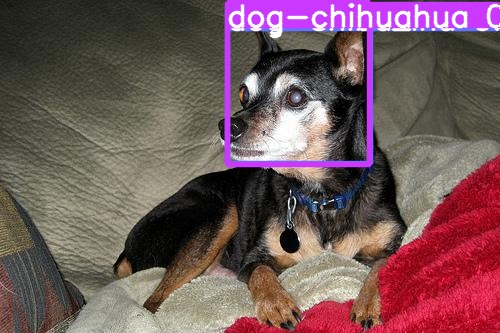

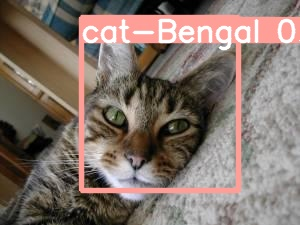

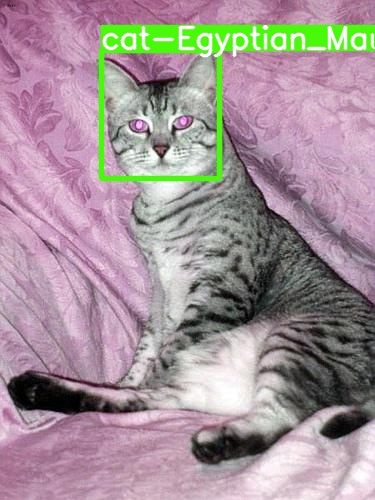

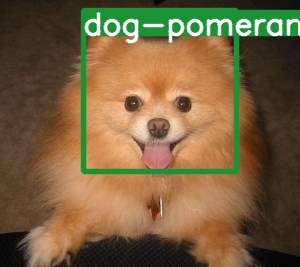

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")